In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
data=pd.read_csv("bank-additional-full.csv",sep=';')
data=data.drop(['duration'],axis=1)
print(data.shape)


(41188, 20)


In [46]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Categorical And Numerical Data

In [47]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])
categorical_data.describe()


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Checking for binary valued columns

In [48]:
for column in data.columns:
    unique_values = data[column].unique()
    if(len(unique_values) == 2):
        print("Unique values in:",column,":", unique_values)

#y and contact columns are binary

Unique values in: contact : ['telephone' 'cellular']
Unique values in: y : ['no' 'yes']


Normalization of numeric data

In [49]:
normalized_numeric_data = (numeric_data - numeric_data.min()) / (numeric_data.max() - numeric_data.min())
normalized_numeric_data.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


In [50]:
categorical_data['y'] = categorical_data['y'].map({'no': 0, 'yes': 1})
normalized_categorical_data = pd.get_dummies(categorical_data, dtype=int)
normalized_categorical_data

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41184,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41185,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41186,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


/Users/hayrettinsendag/anaconda3/envs/tazi/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/hayrettinsendag/anaconda3/envs/tazi/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/hayrettinsendag/anaconda3/envs/tazi/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/hayrettinsendag/anaconda3/envs/tazi/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/hayrettinsendag/anaconda3/envs/tazi/l

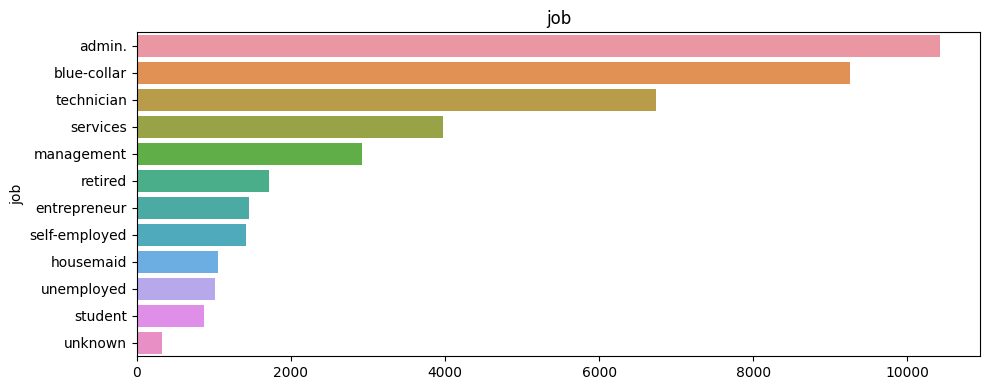

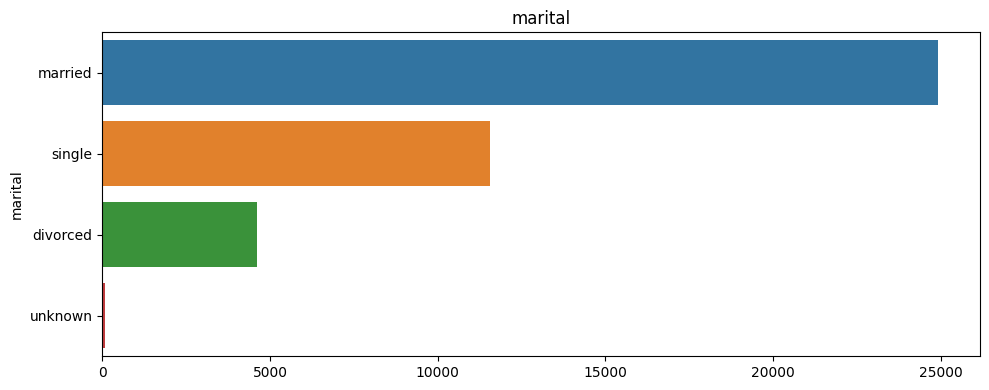

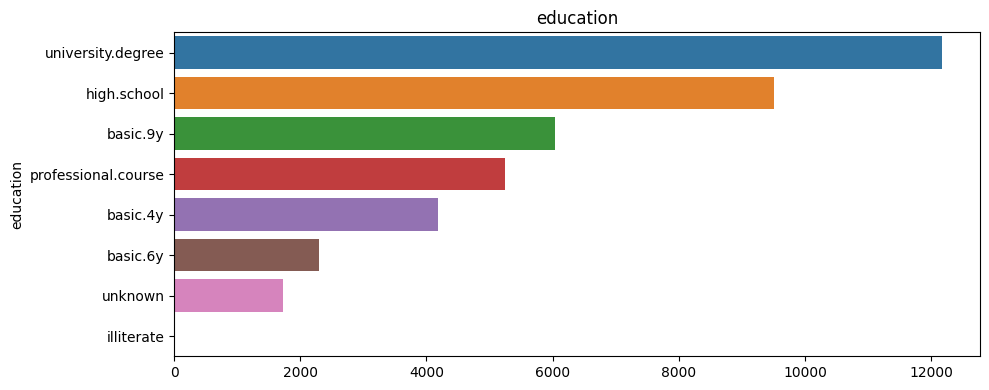

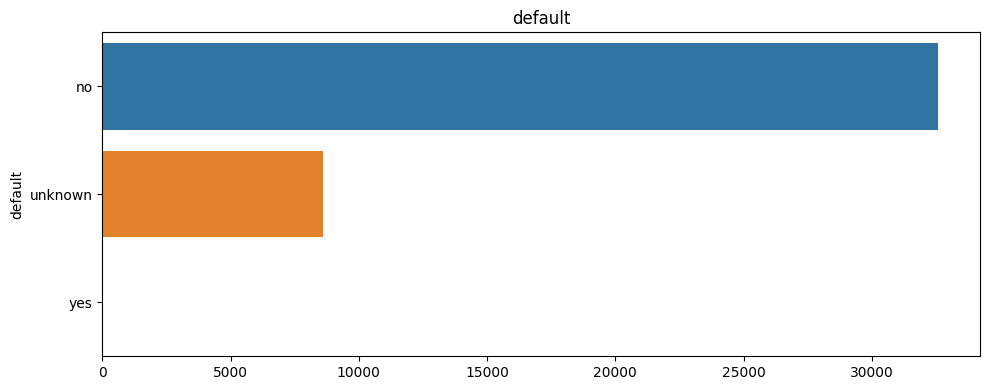

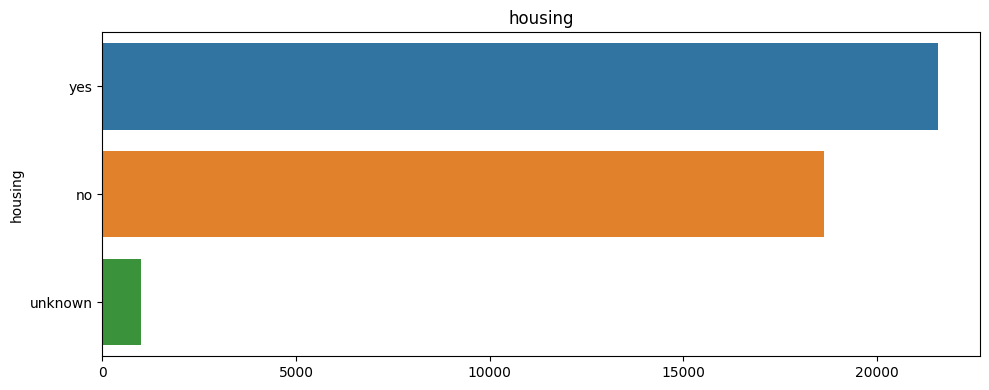

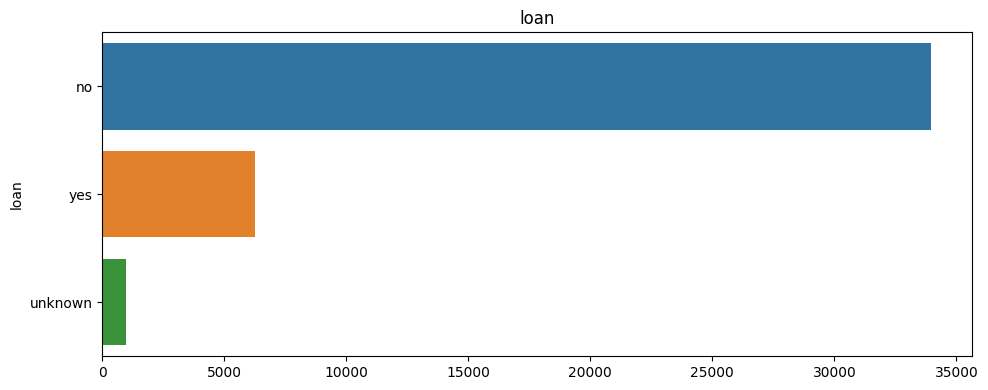

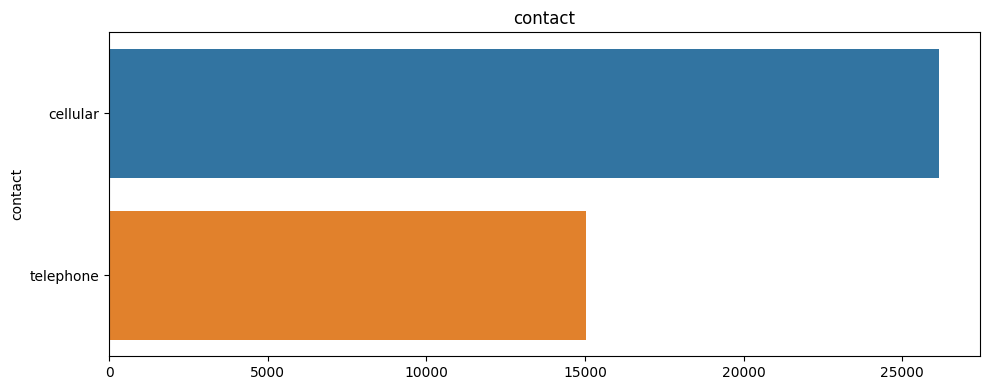

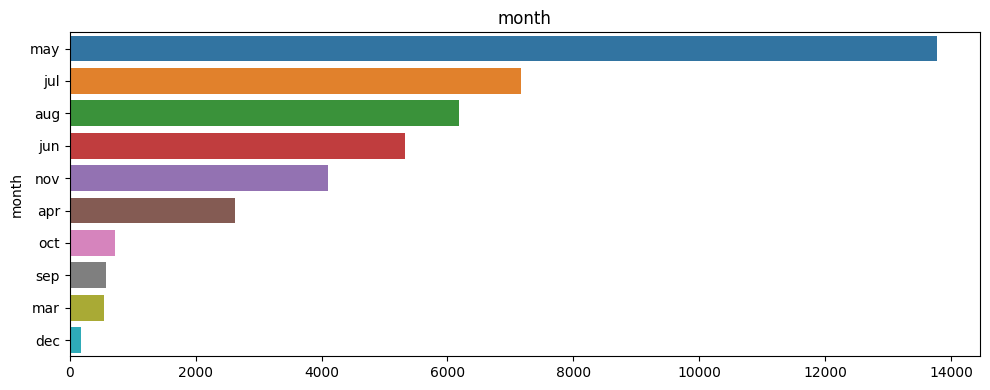

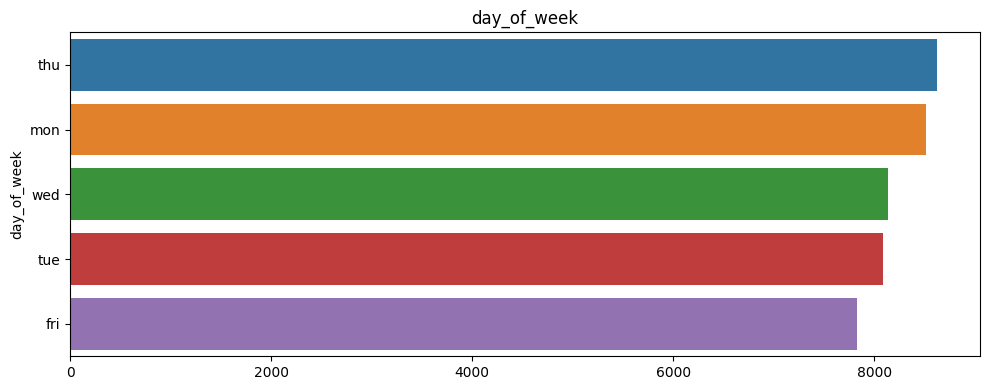

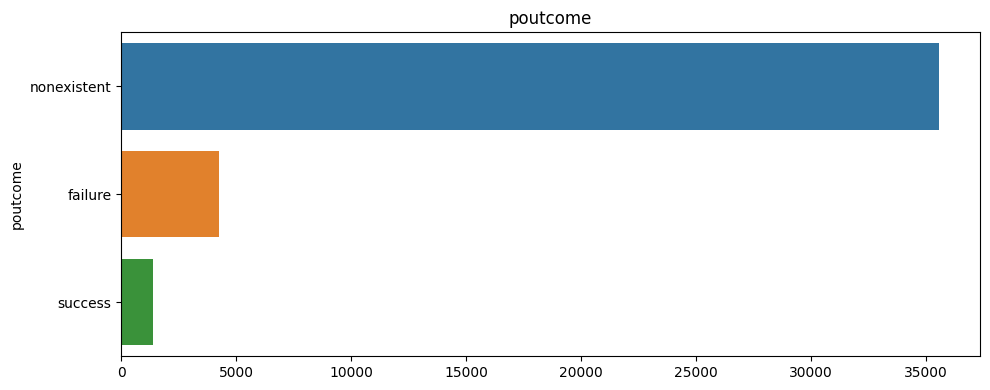

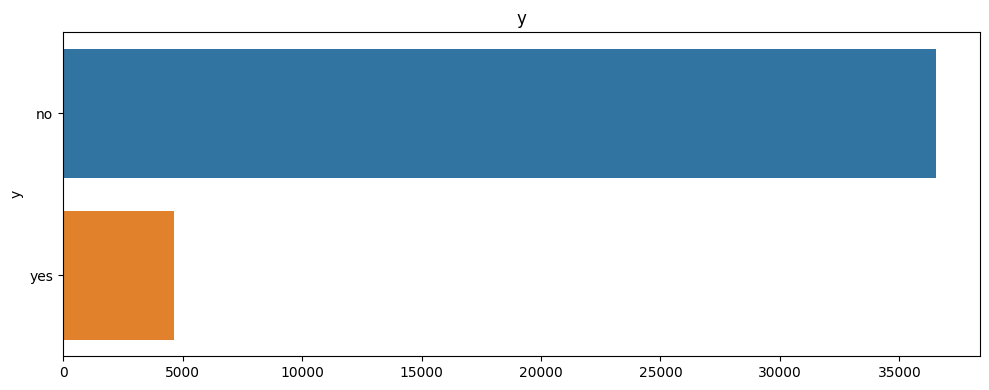

In [51]:
for col in categorical_data:
    plt.figure(figsize=(10,4))
    sns.barplot(x= data[col].value_counts().values, y=data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

/Users/hayrettinsendag/anaconda3/envs/tazi/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/hayrettinsendag/anaconda3/envs/tazi/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/hayrettinsendag/anaconda3/envs/tazi/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/Users/hayrettinsendag/anaconda3/envs/tazi/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/hayrettinsendag/anaconda3/e

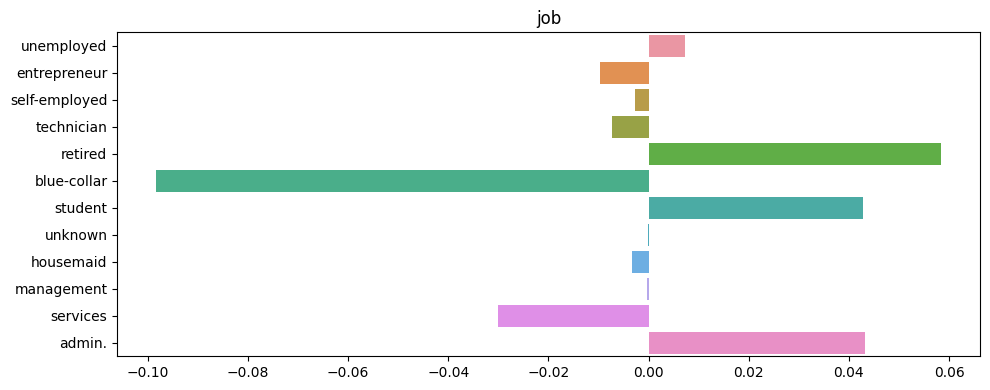

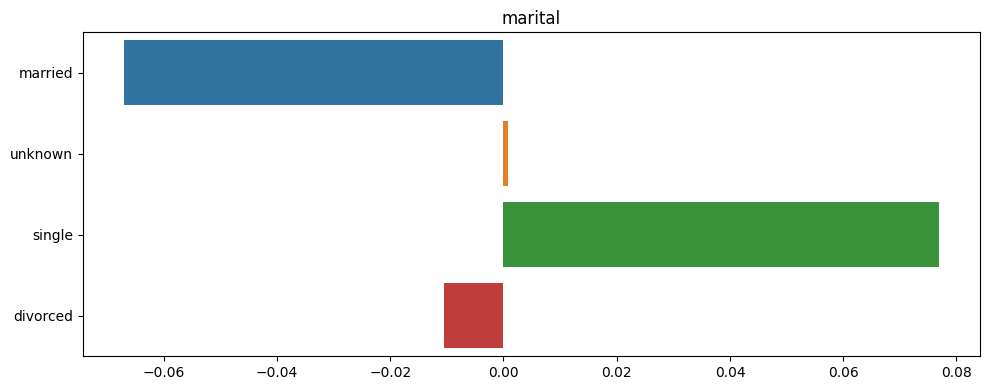

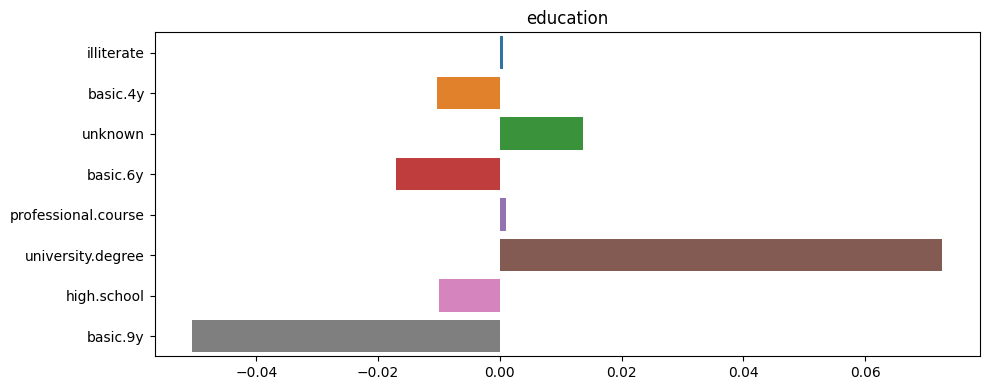

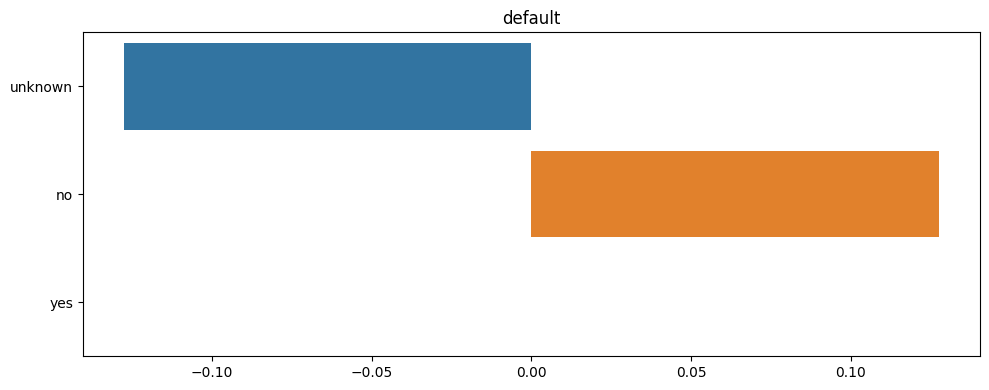

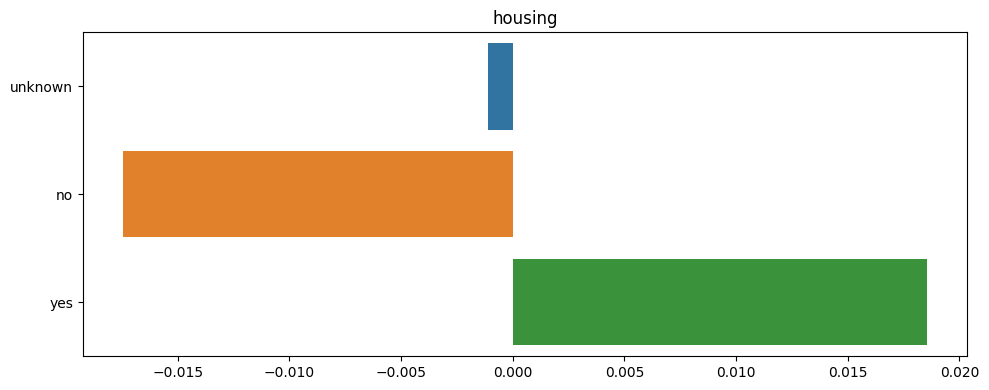

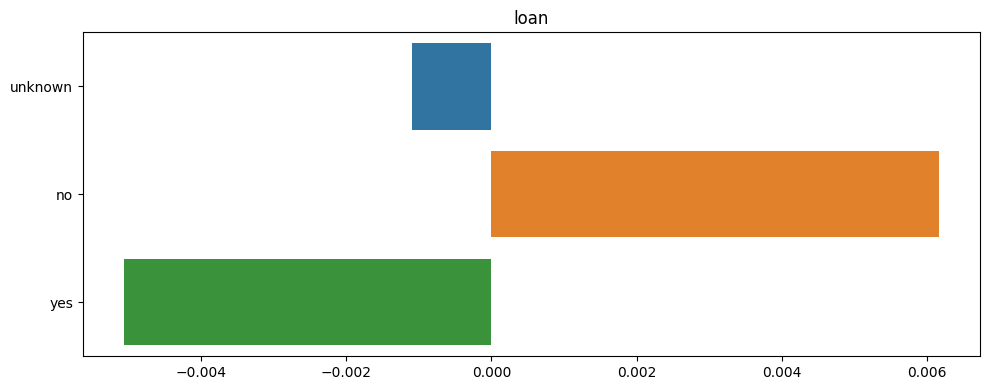

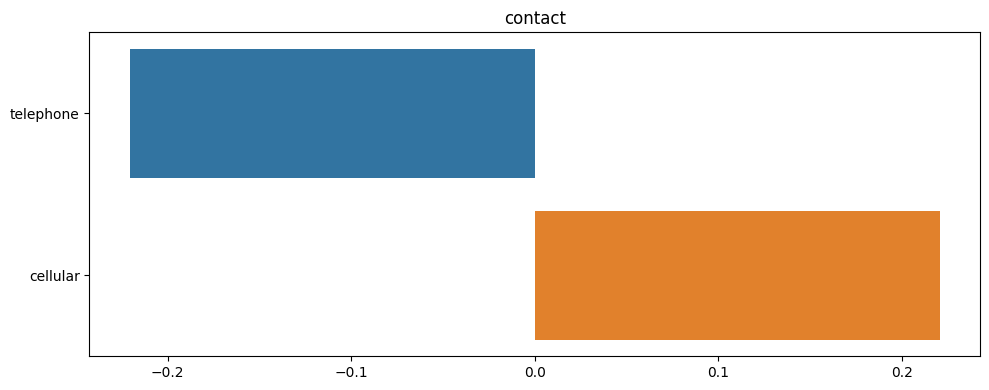

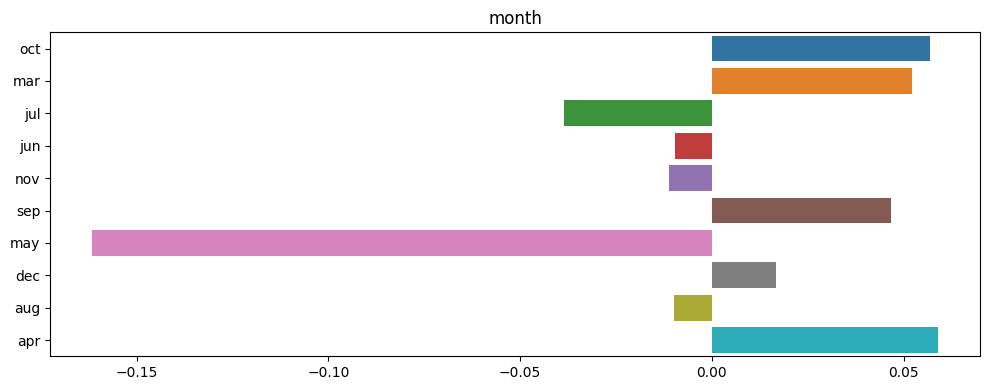

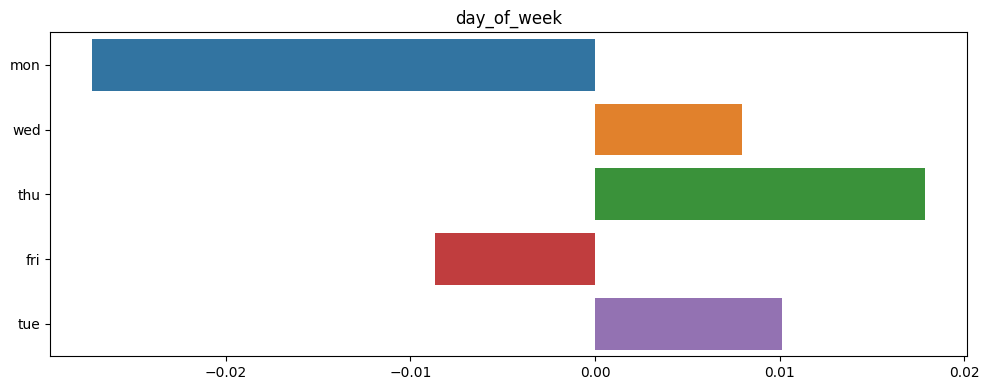

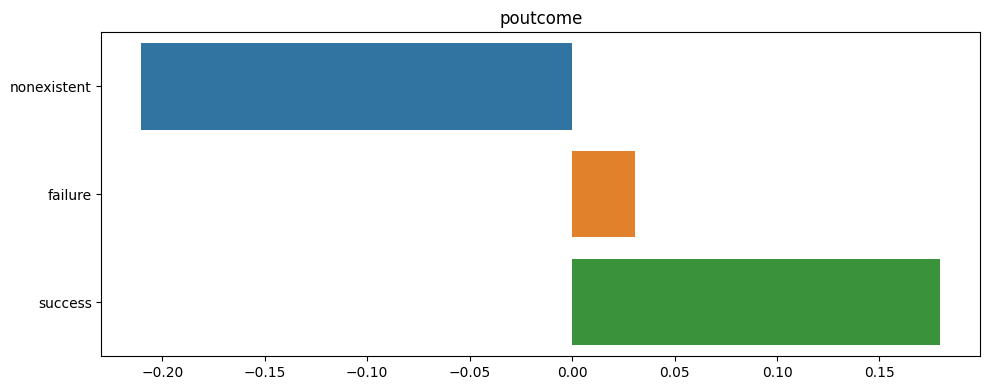

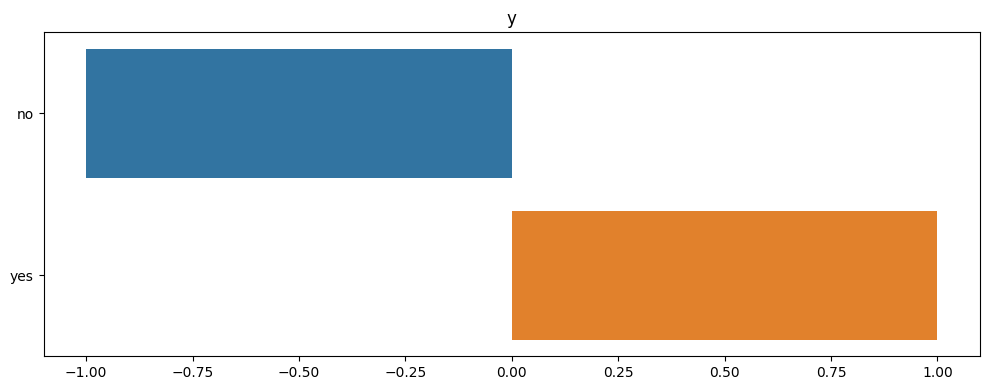

In [52]:
for col in categorical_data:
    plt.figure(figsize=(10, 4))
 
    yes_count = data.loc[data.y.values == 'yes', col].value_counts().to_dict()
    no_count = data.loc[data.y.values == 'no', col].value_counts().to_dict()
    
    
    total_count = list(set(list(yes_count.keys()) + list(no_count.keys())))


    yes_frequency = (data.y.values == 'yes').sum()
    no_frequency = (data.y.values == 'no').sum()
    
    all_index = list(total_count)
    

    total_count = [yes_count.get(k, 0) / yes_frequency - no_count.get(k, 0) / no_frequency for k in total_count]

    
    sns.barplot(x=total_count,y= all_index)
    plt.title(col)
    plt.tight_layout()








In [53]:
for column in data.columns:
    if data[column].isnull().any():
        print("Column ",column," contains missing values.")

There are no columns with missing values

Numerical data

In [54]:
numeric_data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Merging of normalized dataframes

In [55]:
merged = pd.concat([normalized_numeric_data,normalized_categorical_data], axis=1, join='inner')
merged.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,1,0,0,0,0,1,0
1,0.493827,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,1,0,0,0,0,1,0
2,0.246914,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,1,0,0,0,0,1,0
3,0.283951,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,1,0,0,0,0,1,0
4,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,1,0,0,0,0,1,0


train test split

In [56]:
from sklearn.model_selection import train_test_split
x = merged.drop(["y"],axis=1).values
y = merged['y'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8,stratify=y, random_state=42)
from sklearn.utils.class_weight import compute_class_weight
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
print('Original:', y.mean(), 'Train:', (y_train).mean(), 'Test:', (y_test).mean())

x_train shape: (8237, 62)
y_train shape: (8237,)
x_test shape: (32951, 62)
y_test shape: (32951,)
Original: 0.11265417111780131 Train: 0.11266237707903363 Test: 0.11265211981426967


Handling imbalance of target variable

In [57]:
merged['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

Assigning class weights

In [58]:
total_samples = 36548 + 4640
weight_class_0 = total_samples / 36548
weight_class_1 = total_samples / 4640

print("Weight for Class 0:", weight_class_0)
print("Weight for Class 1:", weight_class_1)


Weight for Class 0: 1.126956331399803
Weight for Class 1: 8.876724137931035


Logistic Regression

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

class_weights = {0: weight_class_0, 1: weight_class_1}

logreg = LogisticRegression(class_weight=class_weights,max_iter=10000)
logreg.fit(x_train, y_train)


y_pred_train_logreg = logreg.predict(x_train)
y_pred_test_logreg = logreg.predict(x_test)


acc_log_train = round(logreg.score(x_train, y_train) * 100, 2)
acc_log_test = round(logreg.score(x_test, y_test) * 100, 2)

print("Training Accuracy: {}%".format(acc_log_train))
print("Testing Accuracy: {}%".format(acc_log_test))


report_train = classification_report(y_train, y_pred_train_logreg)
report_test = classification_report(y_test, y_pred_test_logreg)

print("\nClassification Report (Training):")
print(report_train)

print("\nClassification Report (Testing):")
print(report_test)


Training Accuracy: 83.08%
Testing Accuracy: 82.66%

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7309
           1       0.36      0.64      0.46       928

    accuracy                           0.83      8237
   macro avg       0.65      0.75      0.68      8237
weighted avg       0.88      0.83      0.85      8237


Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     29239
           1       0.35      0.62      0.45      3712

    accuracy                           0.83     32951
   macro avg       0.65      0.74      0.67     32951
weighted avg       0.88      0.83      0.85     32951



XG BOOST

In [60]:
import xgboost as xgb

scale_pos_weight = total_samples / 4640
xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight,random_state=42)



xgb_model.fit(x_train, y_train)

y_pred_train_xgb = xgb_model.predict(x_train)
y_pred_test_xgb = xgb_model.predict(x_test)


acc_xgb_train = accuracy_score(y_train, y_pred_train_xgb)
acc_xgb_test = accuracy_score(y_test, y_pred_test_xgb)

print("Training Accuracy (XGBoost): {:.2f}%".format(acc_xgb_train * 100))
print("Testing Accuracy (XGBoost): {:.2f}%".format(acc_xgb_test * 100))

report_train_xgb = classification_report(y_train, y_pred_train_xgb)
report_test_xgb = classification_report(y_test, y_pred_test_xgb)

print("\nClassification Report (Training - XGBoost):")
print(report_train_xgb)

print("\nClassification Report (Testing - XGBoost):")
print(report_test_xgb)




Training Accuracy (XGBoost): 94.83%
Testing Accuracy (XGBoost): 83.92%

Classification Report (Training - XGBoost):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      7309
           1       0.69      0.98      0.81       928

    accuracy                           0.95      8237
   macro avg       0.84      0.96      0.89      8237
weighted avg       0.96      0.95      0.95      8237


Classification Report (Testing - XGBoost):
              precision    recall  f1-score   support

           0       0.93      0.88      0.91     29239
           1       0.35      0.49      0.41      3712

    accuracy                           0.84     32951
   macro avg       0.64      0.68      0.66     32951
weighted avg       0.87      0.84      0.85     32951



In [61]:
confusion_matrix(y_test, logreg.predict(x_test), normalize='true')

array([[0.85310715, 0.14689285],
       [0.3825431 , 0.6174569 ]])

In [62]:
confusion_matrix(y_train, logreg.predict(x_train), normalize='true')

array([[0.85552059, 0.14447941],
       [0.36422414, 0.63577586]])

In [63]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True) 

def confmat_plot(clf, X_train, y_train, X_test, y_test):
    prediction_train = clf.predict(X_train)
    prediction_test = clf.predict(X_test)
    
    train_confusion_matrix = confusion_matrix(y_train,prediction_train).astype('float') / confusion_matrix(y_train,prediction_train).sum(axis=1)[:, np.newaxis]
    test_confusion_matrix = confusion_matrix(y_test,prediction_test).astype('float') / confusion_matrix(y_test,prediction_test).sum(axis=1)[:, np.newaxis]
    
    fig1 = px.imshow(train_confusion_matrix.round(2), text_auto=True,labels=dict(x = "Predicted Class", 
                     y = "Truth Class", color = "Ratio"), x = ['0', '1'], y = ['0', "1"])
    
    fig2 = px.imshow(test_confusion_matrix.round(2), text_auto=True,labels=dict(x="Predicted Class", 
                         y = "Truth Class", color = "Ratio"), x = ['0', '1'], y = ['0', "1"],)

    fig = make_subplots(rows = 1, cols = 2, shared_xaxes = False, vertical_spacing = 0.05,
                            subplot_titles = ("Train", "Test"))

    fig.add_trace(fig1.data[0], row=1, col=1)
    fig.add_trace(fig2.data[0], row=1, col=2)
    fig.update_yaxes(autorange="reversed")
    fig.update_layout(coloraxis_showscale = False ,height = 400, showlegend = False, 
                          title_text = "<b>Confusion Matrices<b>",title_x = 0.5,coloraxis=dict(colorscale='Blues'))

    return fig.show()

confmat_plot(xgb_model,x_train,y_train,x_test,y_test)
confmat_plot(logreg,x_train,y_train,x_test,y_test)